In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
image_dimensions = {'height':256,'width':256,'channels':3}

In [ ]:
class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)

In [ ]:

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
meso = Meso4()
meso.load('/content/Meso4_DF')

In [ ]:
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/path_to_save/Deepfake-detection/data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!git clone https://github.com/kiteco/python-youtube-code.git /content/drive/MyDrive/path_to_save


fatal: destination path '/content/drive/MyDrive/path_to_save' already exists and is not an empty directory.


In [ ]:
data_dir = "/content/drive/MyDrive/path_to_save/Deepfake-detection/data"


In [ ]:

generator.class_indices

{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 2s 2s/step
Predicted likelihood: 0.89937
Actual label: 1
1/1 [==============================] - 0s 19ms/step

Correct prediction: True


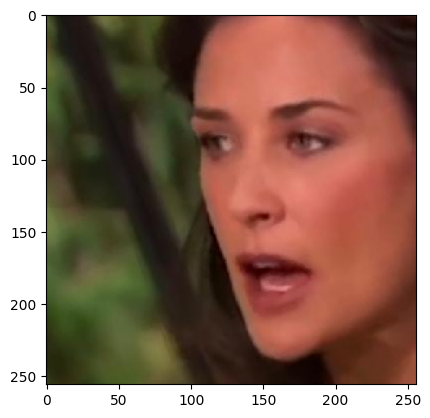

In [ ]:
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.5f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [ ]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [ ]:
for i in range(len(generator.labels)):

    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
3000  predictions completed.
1/1 [==============================] - 0s 18ms/step
4000  predictions completed.
1/1 [==============================] - 0s 18ms/step
5000  predictions completed.
1/1 [==============================] - 0s 24ms/step
6000  predictions completed.
1/1 [==============================] - 0s 30ms/step
7000  predictions completed.
1/1 [==============================] - 0s 23ms/step
All 7104 predictions completed


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

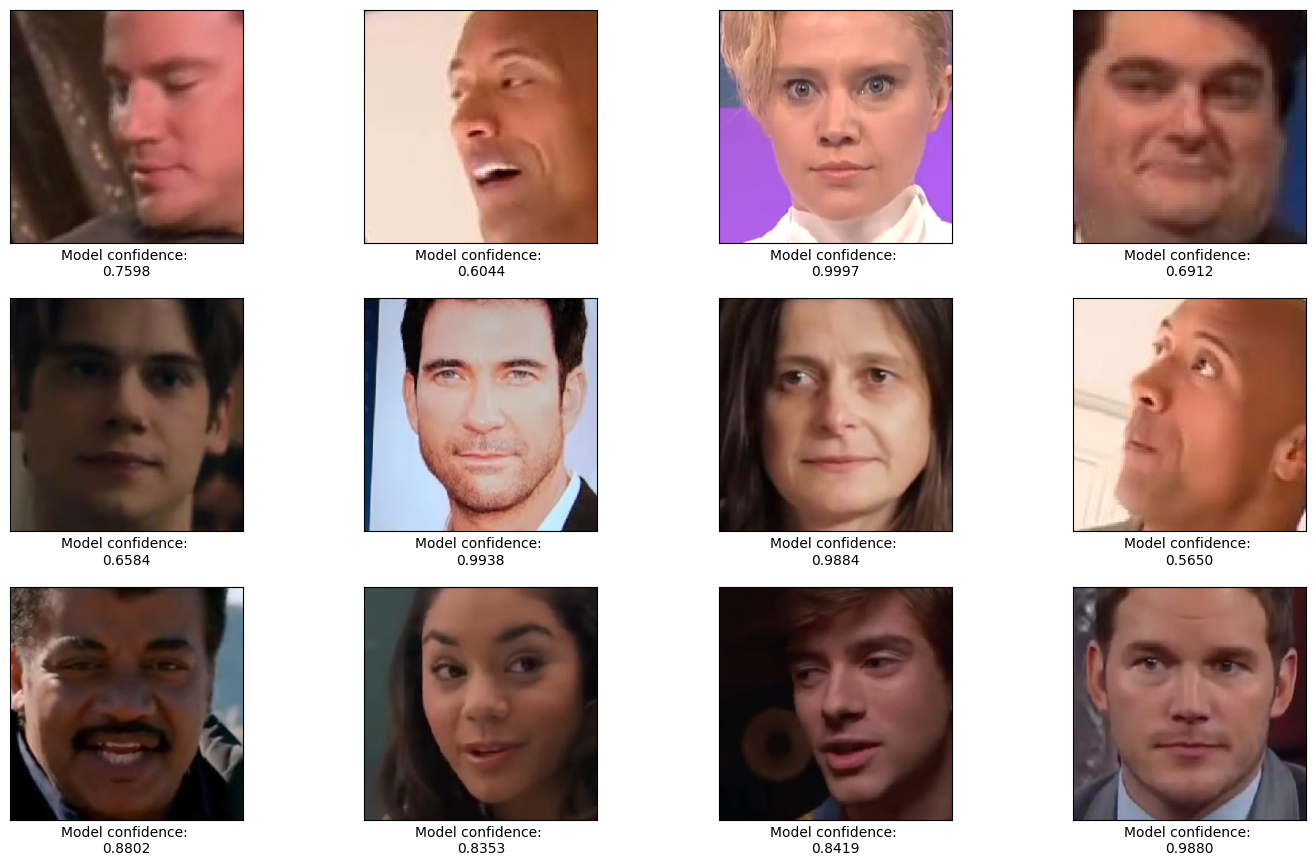

In [ ]:
plotter(correct_real, correct_real_pred)

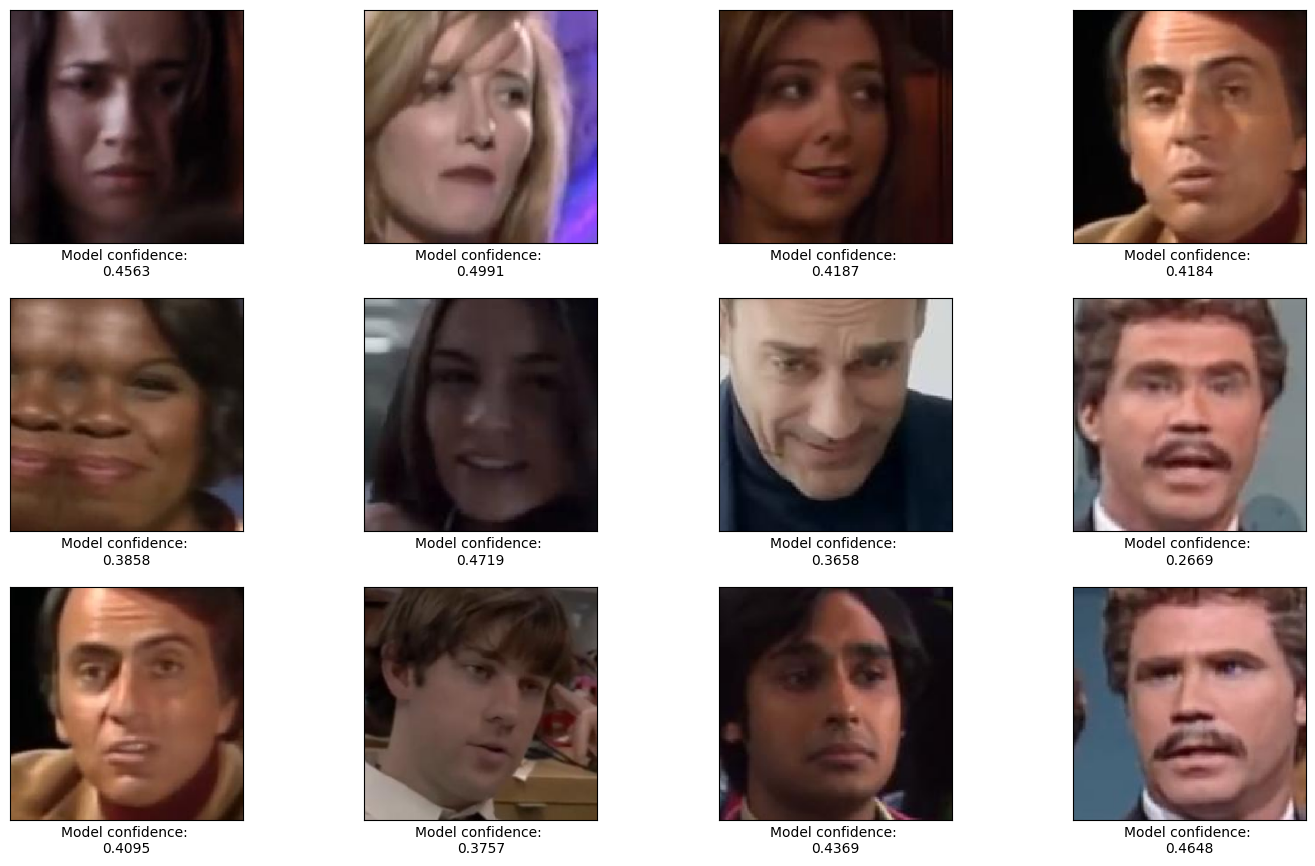

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

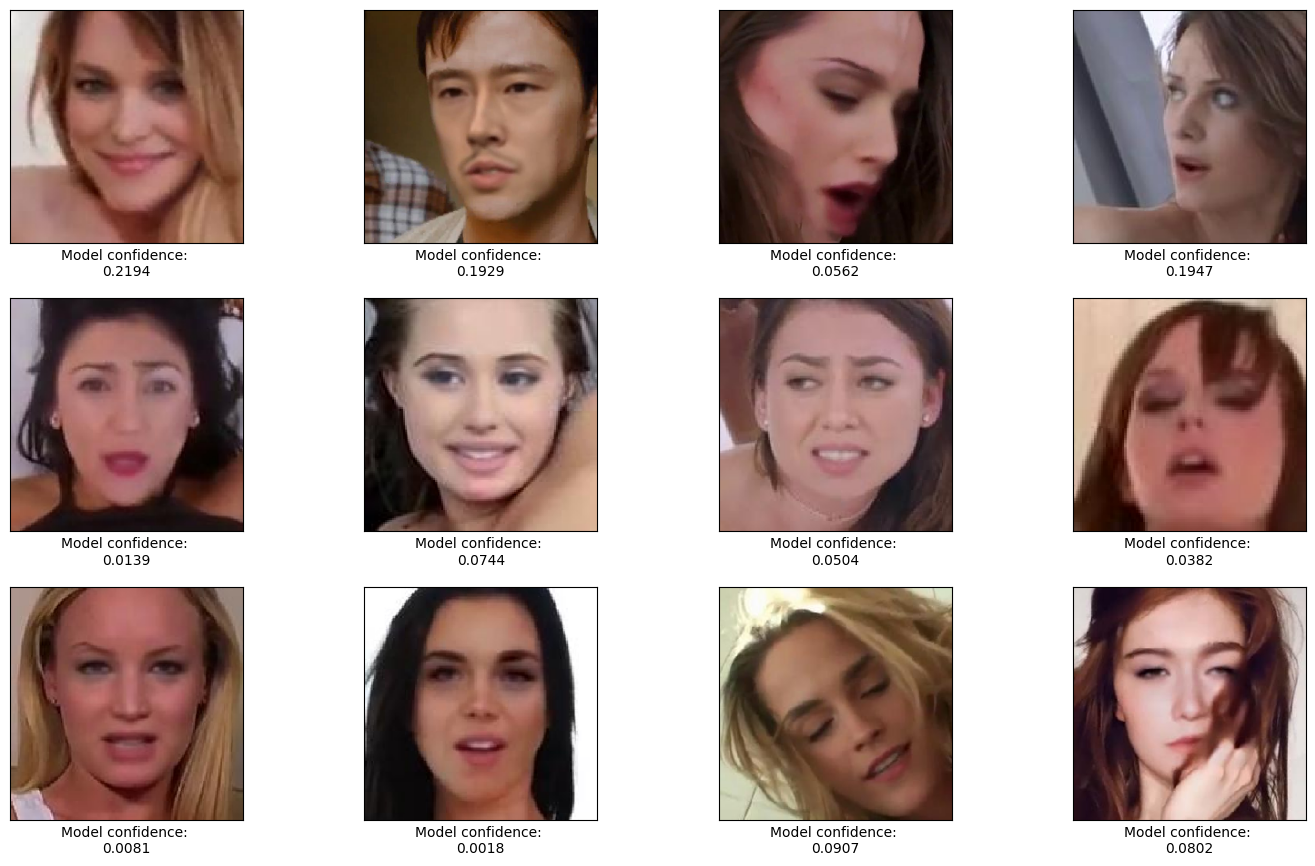

In [ ]:
plotter(correct_deepfake, correct_deepfake_pred)

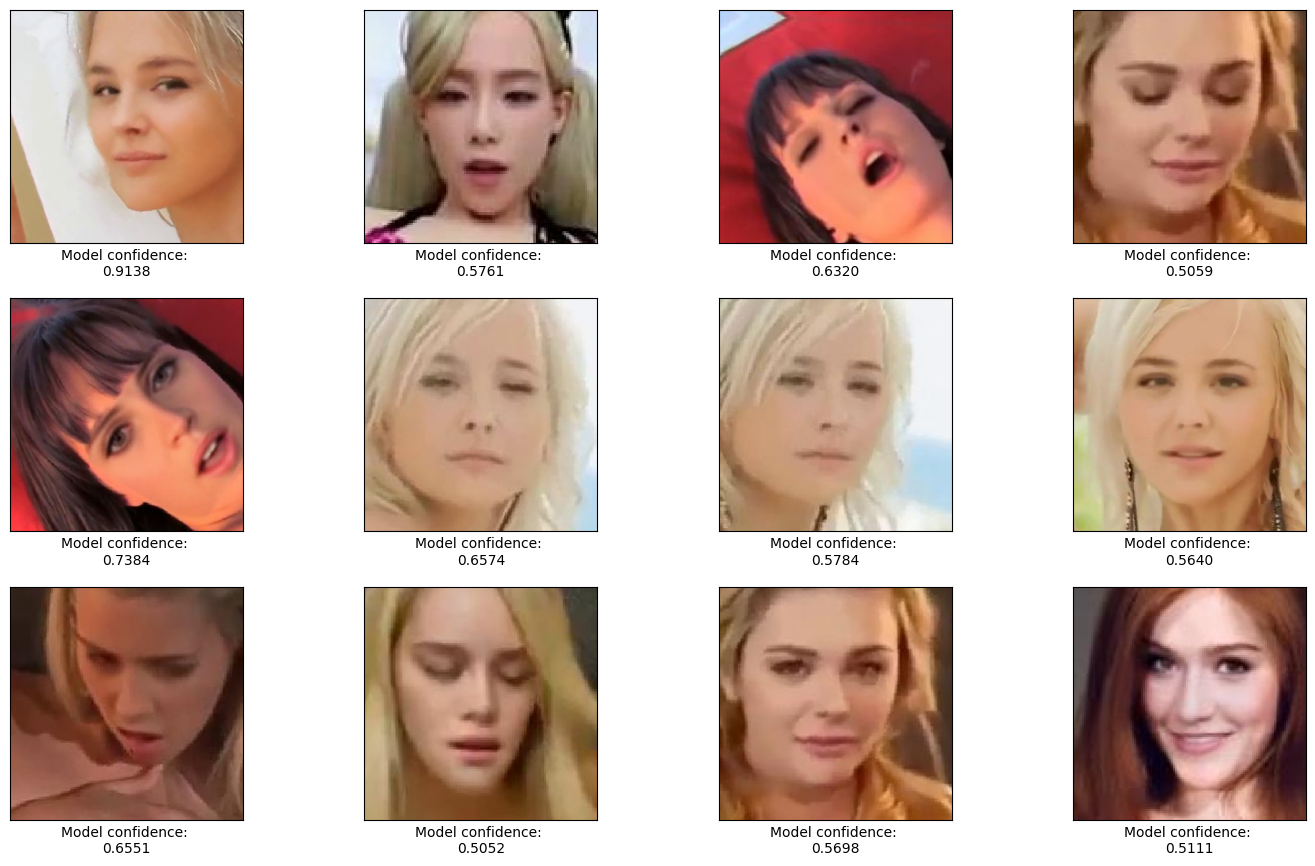

In [ ]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(meso,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

1/1 [==============================] - 0s 120ms/step
Predicted likelihood: 0.99687
Actual label: 1
1/1 [==============================] - 0s 19ms/step

Correct prediction: True


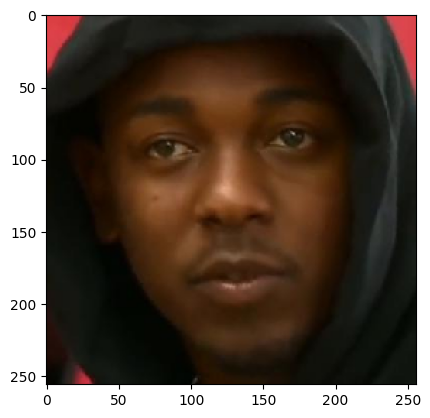

In [ ]:
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {loaded_model.predict(X)[0][0]:.5f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(loaded_model.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [ ]:
meso.model.save('/content/drive/MyDrive/path_to_save/meso4_model')

In [ ]:
# Save the model to a specific directory
meso.model.save('/content/models/meso4_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
